In [56]:
import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


class example

In [4]:
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB

X_train = pd.read_csv("./IMDB dataset/X_train.csv").values
y_train = pd.read_csv("./IMDB dataset/y_train.csv").values.ravel()
X_test = pd.read_csv("./IMDB dataset/X_test.csv").values
y_test = pd.read_csv("./IMDB dataset/y_test.csv").values.ravel()

# Multinomial Naive Bayes (MNB)

In [5]:

mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)
y_predictions = mnb_classifier.predict(X_test)
metrics.accuracy_score(y_test, y_predictions)

0.8322732909316373

### mnb methods

In [48]:
def grid_search_MNB(alphas):
    parameters = {'alpha': alphas}
    classifier = MultinomialNB()
    grid_search = GridSearchCV(
        classifier,
        parameters,
        cv=4,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    print("Best alpha: ", grid_search.best_params_['alpha'])
    predictions = grid_search.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
    return grid_search


def graph_grid_search(grid_search):
    plt.title("MNB")
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy (0 - 1)")

    # scores = [entry[1] for entry in grid_search.cv_results_['mean_test_score']]
    train_scores = grid_search.cv_results_["mean_train_score"]
    test_scores = grid_search.cv_results_["mean_test_score"]
    print(test_scores)
    # scores = np.array(scores).reshape(len(alphas), 1)
    plt.plot(alphas, train_scores, 'b')
    plt.plot(alphas, test_scores, 'r')
    # for index, value in enumerate(alphas):
    #     plt.plot(alphas[index], scores[index])
    plt.legend()
    # fig = plt.figure()
    plt.show()

## MNB parameter optimization
### MNB log 1 to 10000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best alpha:  0.3593813663804626
Accuracy:  0.8323132925317013
CPU times: user 41 s, sys: 8.9 s, total: 49.9 s
Wall time: 7.07 s
[0.83231351 0.83231351 0.83231351 0.83231351 0.83231351 0.83231351
 0.83231351 0.83231351 0.83243351 0.83239351]


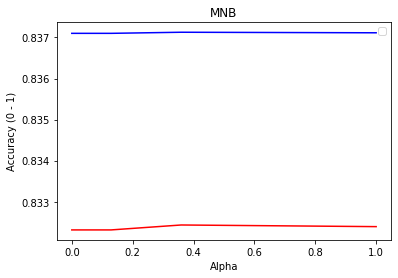

In [49]:
alphas = np.logspace(-4, 0, 10)

grid_search = % time grid_search_MNB(alphas)
graph_grid_search(grid_search)

### MNB log 0.1 to 100

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argum

Best alpha:  0.3469387755102041
Accuracy:  0.8323132925317013
CPU times: user 3min 27s, sys: 48.3 s, total: 4min 15s
Wall time: 36.4 s
[0.83231351 0.83231351 0.83231351 0.83231351 0.83231351 0.83231351
 0.83231351 0.83231351 0.83235351 0.83235351 0.83235351 0.83235351
 0.83235351 0.83235351 0.83235351 0.83235351 0.83239351 0.83243351
 0.83243351 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351
 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351
 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351
 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351
 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351 0.83239351
 0.83239351 0.83239351]


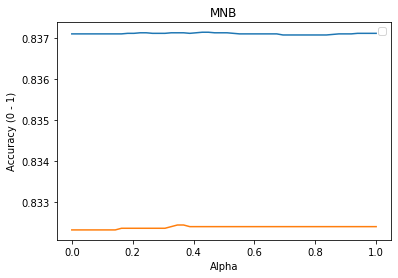

In [44]:
alphas = np.linspace(0, 1, 50)

grid_search = % time grid_search_MNB(alphas)
graph_grid_search(grid_search)

In [73]:
alphas = np.linspace(20, 22, 50)

% time grid_search_MNB(alphas)

Best alpha:  20.122448979591837
Accuracy:  0.8320332813312532
CPU times: user 1min 53s, sys: 1min 3s, total: 2min 57s
Wall time: 30.8 s


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


1000
ingored:  0


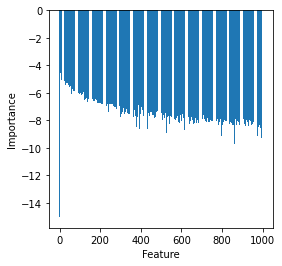

1.0000000000000013

In [47]:

mnb_classifier = MultinomialNB(alpha=0.336734693877551)
mnb_classifier.fit(X_train, y_train)
importance = mnb_classifier.coef_[0]
print(len(importance))
print("ingored: ", (importance == 0).sum())

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
sum([np.exp(1) ** x for x in mnb_classifier.coef_[0]])

In [90]:

mnb_classifier = MultinomialNB(alpha=0.3469387755102041)
mnb_classifier.fit(X_train, y_train)

y_predictions = mnb_classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_predictions))

# y_predictions = mnb_classifier.predict(X_train)
# print(metrics.accuracy_score(y_train, y_predictions))

misclassified_indices = np.where((y_predictions != y_test))[0]
print(len(y_test))
print(len(misclassified_indices))

k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

print(y_test[misclassified_indices[0]])
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(3):
    columns += ["Neigbor#{}_idx".format(i + 1), "Neigbor#{}_True Class".format(i + 1),
        "Neigbor#{}_Distance".format(i + 1)]

print(columns)
df = pd.DataFrame(columns=columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] = y_test[misclassified_indices]
df["Pred Class"] = y_predictions[misclassified_indices]
for i in range(3):
    df["Neigbor#{}_idx".format(i + 1)] = indices[:, i]
    df["Neigbor#{}_True Class".format(i + 1)] = y_train[indices[:, i]]
    df["Neigbor#{}_Distance".format(i + 1)] = np.around(distances[:, i], decimals=2)

df

0.8323132925317013
24999
4192
1.0
['Misclassified Test idx', 'True Class', 'Pred Class', 'Neigbor#1_idx', 'Neigbor#1_True Class', 'Neigbor#1_Distance', 'Neigbor#2_idx', 'Neigbor#2_True Class', 'Neigbor#2_Distance', 'Neigbor#3_idx', 'Neigbor#3_True Class', 'Neigbor#3_Distance']


,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,3,1.0,0.0,10769,1.0,7.14,14151,1.0,7.21,15028,0.0,7.28
1,4,1.0,0.0,22376,1.0,7.28,18830,0.0,7.35,22542,0.0,7.35
2,7,0.0,1.0,418,1.0,7.28,24990,1.0,7.35,4695,0.0,7.42
3,16,0.0,1.0,922,1.0,8.43,6225,1.0,8.43,23019,0.0,8.43
4,24,1.0,0.0,14985,0.0,10.20,2536,0.0,10.30,8644,1.0,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...
4187,24979,1.0,0.0,418,1.0,8.00,17909,1.0,8.06,9761,0.0,8.12
4188,24984,1.0,0.0,10769,1.0,6.08,13509,1.0,6.40,2176,1.0,6.48
4189,24987,1.0,0.0,22526,0.0,8.60,5663,1.0,8.66,18830,0.0,8.66
4190,24992,0.0,1.0,13878,0.0,5.00,4695,0.0,5.20,14169,1.0,5.29
